# Importing Required Libaries:

In [24]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from imblearn.over_sampling import SMOTE
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Read the Data:

In [4]:
data=pd.read_csv(r"E:\Protfolio Projects\Machince Learning\cyberbylling detection\Dataset\youtube_parsed_dataset.csv")

# Data Description:

In [5]:
data.head(10)

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0
5,5,X6,jejus lindos de maiss carlos canta um ritmo ma...,12,1,3,3,0,27,0
6,6,X7,Ale pajac,1,0,3,5,0,23,0
7,7,X8,"How's ,freedom, working out for you? Still liv...",19,1,6,5,0,56,0
8,8,X9,nicki's too sexy holy hell oh. my. god. DON'T ...,8,0,3,5,0,20,0
9,9,X10,stupid video George Z had to do that in self d...,6,0,2,3,0,15,0


In [6]:
print("No.of rows in dataset:",data.shape[0])
print("No.of columns in dataset:",data.shape[1])

No.of rows in dataset: 3464
No.of columns in dataset: 10


# Exploring the Data:

#1) Check the null values:

#2) check the duplicate values in dataset:

#3) check the dtype of the dataset:

In [7]:
data.isnull().sum()

index                    0
UserIndex                0
Text                     0
Number of Comments       0
Number of Subscribers    0
Membership Duration      0
Number of Uploads        0
Profanity in UserID      0
Age                      0
oh_label                 0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  3464 non-null   int64 
 1   UserIndex              3464 non-null   object
 2   Text                   3464 non-null   object
 3   Number of Comments     3464 non-null   int64 
 4   Number of Subscribers  3464 non-null   int64 
 5   Membership Duration    3464 non-null   int64 
 6   Number of Uploads      3464 non-null   int64 
 7   Profanity in UserID    3464 non-null   int64 
 8   Age                    3464 non-null   int64 
 9   oh_label               3464 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 270.8+ KB


In [10]:
data["oh_label"].value_counts()

0    3047
1     417
Name: oh_label, dtype: int64

# Exploring Data Clasess:
#1) class= 0 represents Non_cyberbylling, class=1 represents cyberbylling

# Exploring the Data (Data visualization):

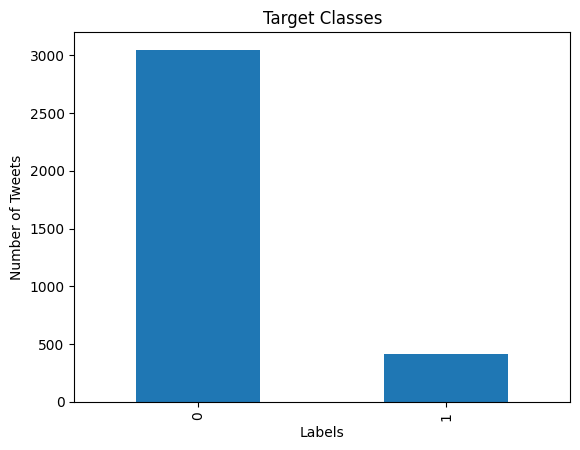

In [11]:
target_variable= data['oh_label'].value_counts()
target_variable.plot(kind='bar')
plt.title('Target Classes')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

# Data Transformation:

In [12]:
cyber_data=data.filter(items=["Text","oh_label"])
cyber_data.head()

,Text,oh_label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0
1,There are so many things that are incorrect wi...,0
2,3:26 hahah my boyfriend showed this song to me...,1
3,dick beyonce fuck y a ass hole you are truely ...,1
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0


In [13]:
X=data["Text"]
X.head(2)

0    Does N.e.bodyelse Hear her Crazy ass Screamin ...
1    There are so many things that are incorrect wi...
Name: Text, dtype: object

In [14]:
y=data["oh_label"]
y.head(2)

0    0
1    0
Name: oh_label, dtype: int64

In [19]:
X.iloc[0]

"Does N.e.bodyelse Hear her Crazy ass Screamin ,HOE, everytime she say's Stupid Hoe .. Lol. did n.e.body see Chris Browns face at 2:04 wen Nicki was touchin him If you worked out we wouldn't be lookin at that Body D: She looks so tired :/ She has ah Tatto on her ass Wtf is this o.O Instagram Deze Nutt's In Yo Mouth Lmao This Video/Song made me ah Lil. Umm . . . .In the mood .___. We're all in this together motherfucka Wow you have an amazing voice. And I've never said that about anyone."

In [28]:
def clean_text(text):
    # Removing punctuation:
    text=text.translate(str.maketrans(" "," ",string.punctuation))
    # Remove Lowercase:
    text=text.lower()
    # Tokenize the text:
    tokens=word_tokenize(text)
    # Remove stopwords:
    stopwords=set(stopwords.words("english"))
    filter_words=[word for word in tokens if word not in stopwords]
    # Lemmatize the filter_words:
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[lemmatizer.lemmatize(word) for word in filter_token]
    
    return clean_text

In [29]:

Final_data=clean_text(X)

AttributeError: 'Series' object has no attribute 'translate'